In [20]:
import matplotlib.pyplot as plt ,numpy as np, pandas as pd,seaborn as sns

In [21]:
df=sns.load_dataset('tips')

In [22]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [24]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [25]:
non_normal_data = df[df['total_bill'] < df['total_bill'].mean()]

In [26]:
non_normal_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
6,8.77,2.00,Male,No,Sun,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Violin plot

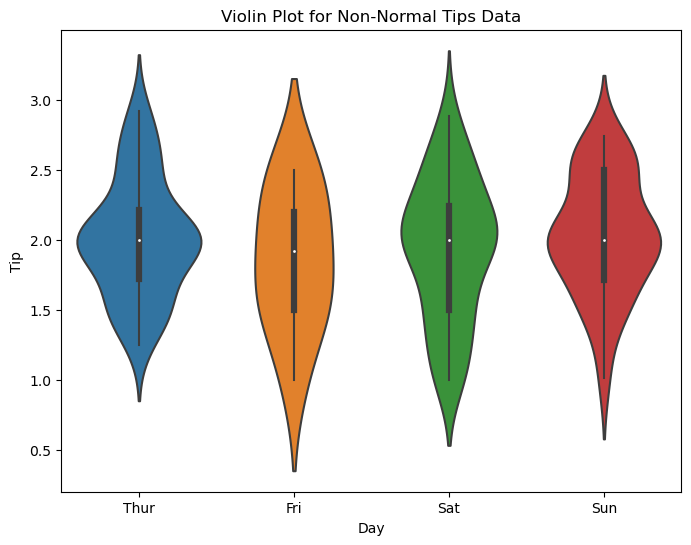

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))

# Extracting non-normal distribution data for 'tip'
non_normal_tip_data = df[df['tip'] < df['tip'].mean()]

# Creating a violin plot for non-normal 'tip' data
sns.violinplot(x='day', y='tip', data=non_normal_tip_data)

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Violin Plot for Non-Normal Tips Data')

plt.show()


## Histogram

Text(0.5, 1.0, 'Histogram of Total Bill')

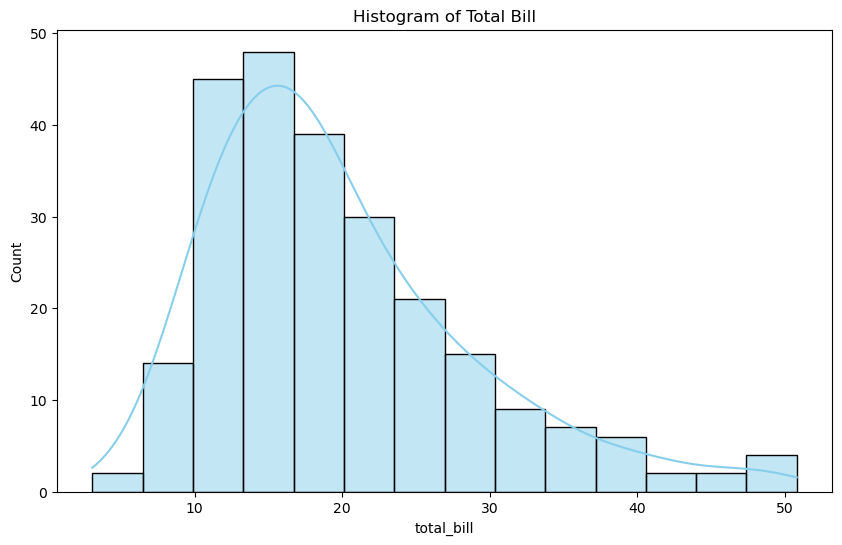

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['total_bill'], kde=True, color='skyblue')
plt.title('Histogram of Total Bill')


## density plot

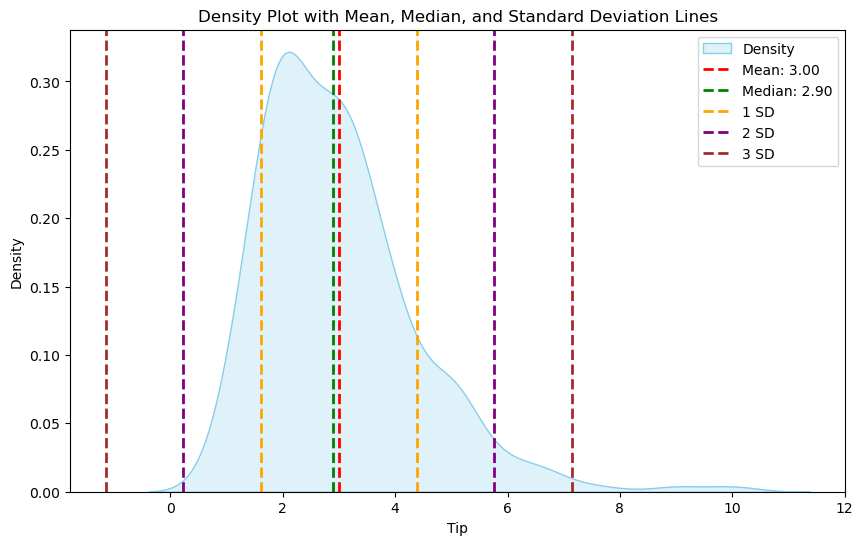

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Creating a density plot for 'tip' data
sns.kdeplot(df['tip'], fill=True, color='skyblue', label='Density')

# Adding mean and median lines
mean_tip = df['tip'].mean()
median_tip = df['tip'].median()
plt.axvline(mean_tip, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_tip:.2f}')
plt.axvline(median_tip, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_tip:.2f}')

# Adding standard deviation lines
std_tip = df['tip'].std()
plt.axvline(mean_tip + std_tip, color='orange', linestyle='dashed', linewidth=2, label=f'1 SD')
plt.axvline(mean_tip - std_tip, color='orange', linestyle='dashed', linewidth=2)
plt.axvline(mean_tip + 2 * std_tip, color='purple', linestyle='dashed', linewidth=2, label=f'2 SD')
plt.axvline(mean_tip - 2 * std_tip, color='purple', linestyle='dashed', linewidth=2)
plt.axvline(mean_tip + 3 * std_tip, color='brown', linestyle='dashed', linewidth=2, label=f'3 SD')
plt.axvline(mean_tip - 3 * std_tip, color='brown', linestyle='dashed', linewidth=2)

# Adding labels and title
plt.xlabel('Tip')
plt.ylabel('Density')
plt.title('Density Plot with Mean, Median, and Standard Deviation Lines')
plt.legend()

plt.show()


## Scatterplot

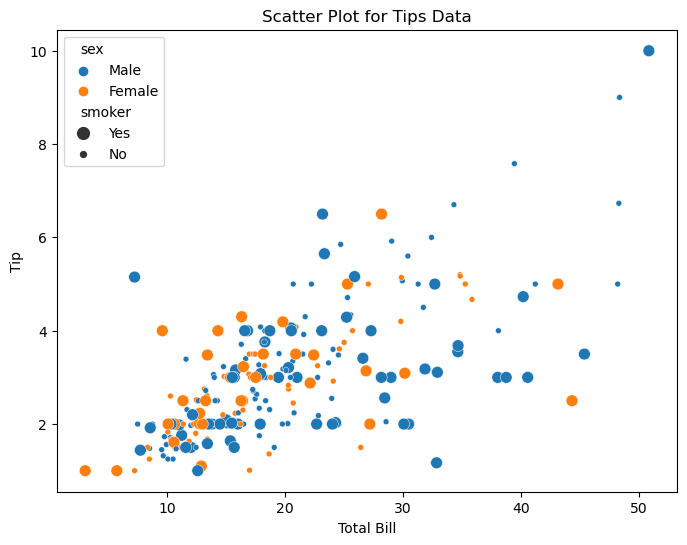

In [16]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))

# Creating a scatter plot for 'total_bill' vs 'tip'
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', size='smoker')
# Adding labels and title
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot for Tips Data')

plt.show()


## Pie-Plot

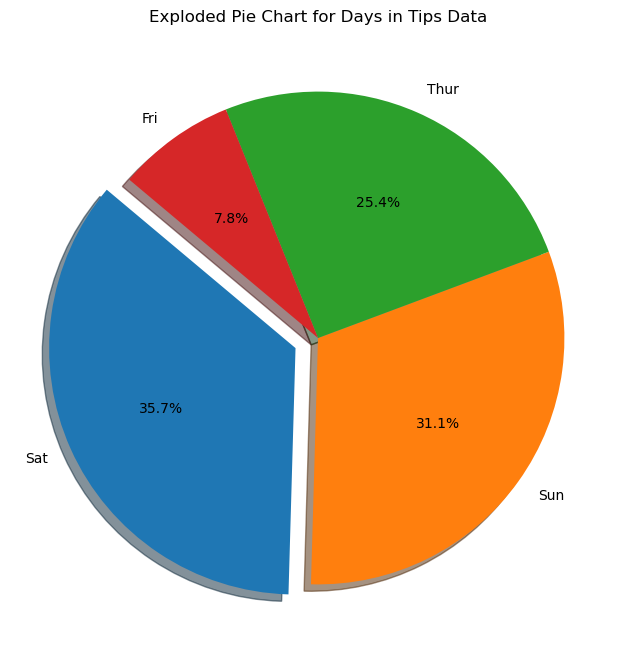

In [17]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 8))

# Extracting unique categories and their counts
category_counts = df['day'].value_counts()

# Explode the pie chart
explode = (0.1, 0, 0, 0)  # Explode the first slice (e.g., 'Thur')

# Creating a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)

# Adding a title
plt.title('Exploded Pie Chart for Days in Tips Data')

plt.show()


## Count plot

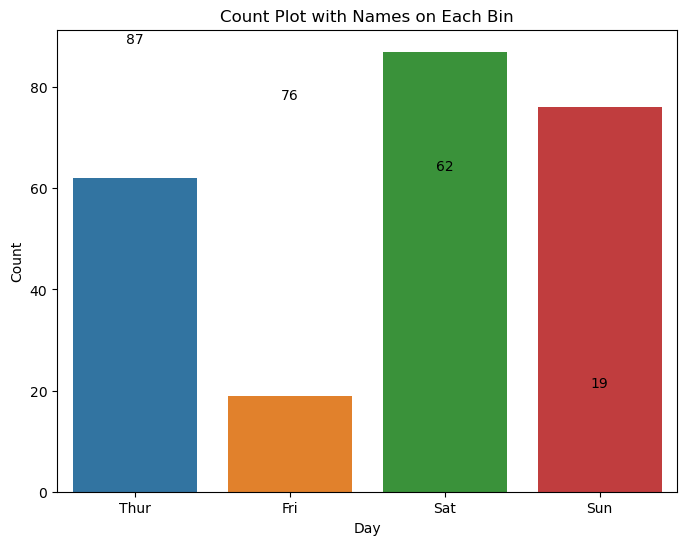

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))

# Creating a count plot with names on each bin
sns.countplot(x='day', data=df)

# Adding count labels on each bin
for index, value in enumerate(df['day'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count Plot with Names on Each Bin')

plt.show()


## Butterfly plot

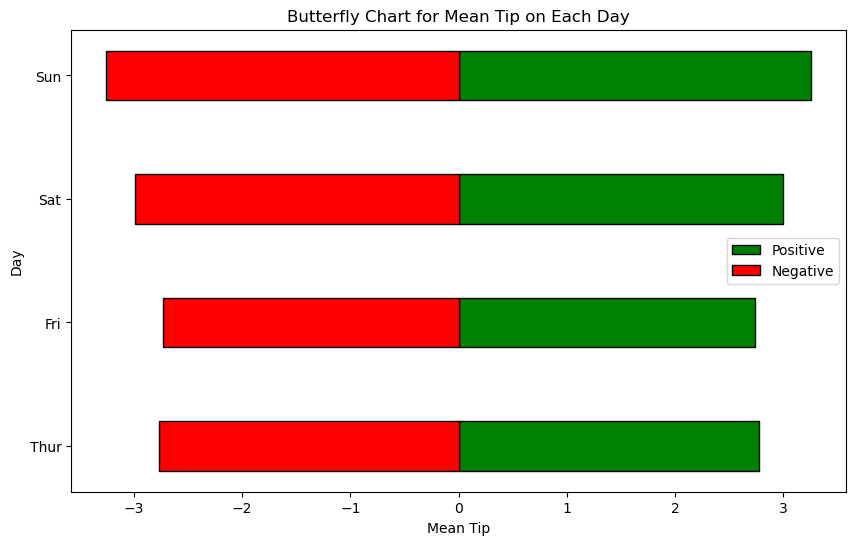

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Calculate mean tip for each day
mean_tip_per_day = df.groupby('day')['tip'].mean()

# Create a butterfly chart
bar_width = 0.4
days = mean_tip_per_day.index
positive_values = mean_tip_per_day.values
negative_values = -mean_tip_per_day.values

plt.barh(days, positive_values, color='green', edgecolor='black', height=bar_width, label='Positive')
plt.barh(days, negative_values, color='red', edgecolor='black', height=bar_width, label='Negative')

# Adding labels and title
plt.xlabel('Mean Tip')
plt.ylabel('Day')
plt.title('Butterfly Chart for Mean Tip on Each Day')

# Displaying a legend
plt.legend()

plt.show()


In [20]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

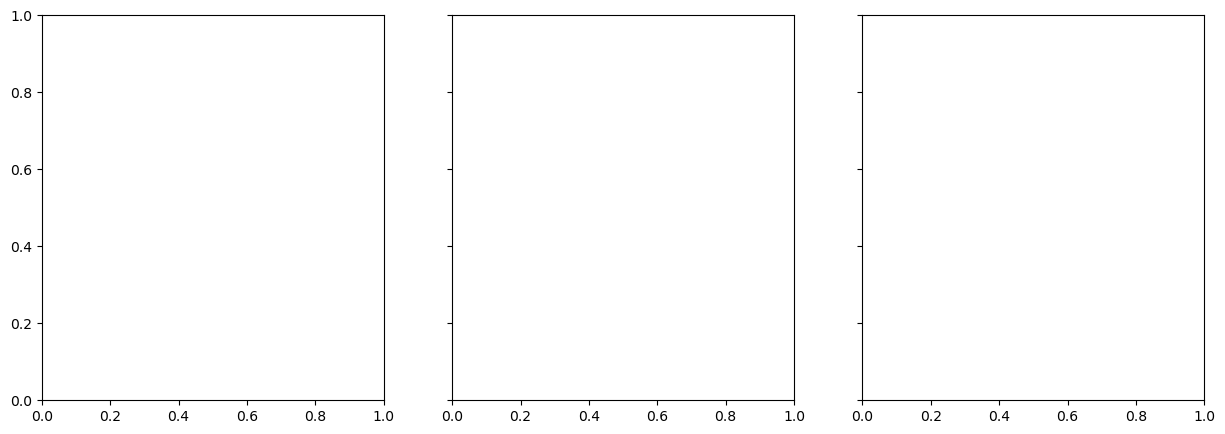

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

## 3 different plot on violin of non normal data in one row 

Text(0.5, 1.0, 'Violin Plot for  Smokers')

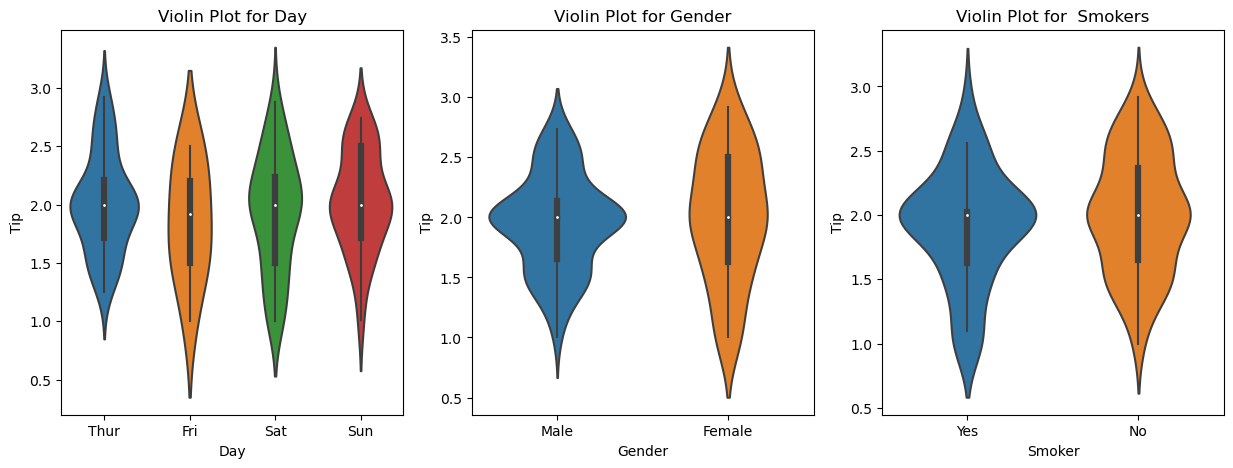

In [22]:
non_normal_tip_data = df[df['tip'] < df['tip'].mean()]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.violinplot(x='day', y='tip', data=non_normal_tip_data,vert=False)
# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Violin Plot for Day')


plt.subplot(1, 3, 2)
sns.violinplot(x='sex', y='tip', data=non_normal_tip_data,vert=False)
# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.title('Violin Plot for Gender')


plt.subplot(1, 3, 3)
sns.violinplot(x='smoker', y='tip', data=non_normal_tip_data,vert=False)
# Adding labels and title
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.title('Violin Plot for  Smokers')
#fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(50, 35))


## Histogram , Density ,Scatter plot in one row  using subplot 

Text(0.5, 1.0, 'Scatter Plot for Tips Data')

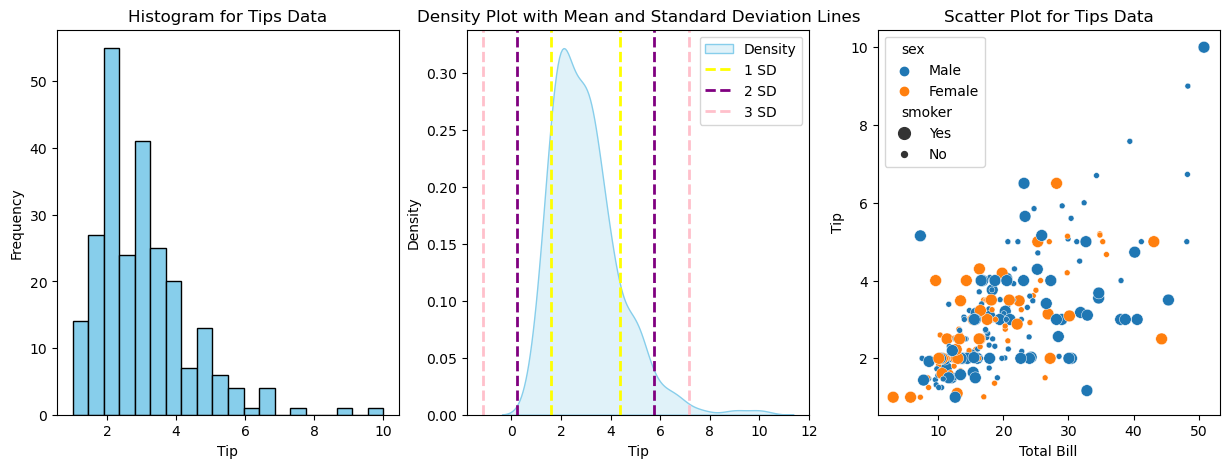

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1)
# Creating a histogram for 'tip' data
plt.hist(df['tip'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Histogram for Tips Data')


plt.subplot(1, 3, 2)
sns.kdeplot(df['tip'], fill=True, color='skyblue', label='Density')
mean_tip = df['tip'].mean()
std_tip = df['tip'].std()
plt.axvline(mean_tip + std_tip, color='yellow', linestyle='dashed', linewidth=2, label=f'1 SD')
plt.axvline(mean_tip - std_tip, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(mean_tip + 2 * std_tip, color='purple', linestyle='dashed', linewidth=2, label=f'2 SD')
plt.axvline(mean_tip - 2 * std_tip, color='purple', linestyle='dashed', linewidth=2)
plt.axvline(mean_tip + 3 * std_tip, color='pink', linestyle='dashed', linewidth=2, label=f'3 SD')
plt.axvline(mean_tip - 3 * std_tip, color='pink', linestyle='dashed', linewidth=2)

# Adding labels and title
plt.xlabel('Tip')
plt.ylabel('Density')
plt.title('Density Plot with Mean and Standard Deviation Lines')
plt.legend()

plt.subplot(1, 3, 3)
# Creating a scatter plot for 'total_bill' vs 'tip'
sns.scatterplot(data=df,x='total_bill',y='tip',hue='sex',size='smoker')

# Adding labels and title
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot for Tips Data')


### entire row  one violin plot

C:\Users\mdimr\AppData\Local\Temp\ipykernel_12804\260394996.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes_violin = plt.subplot(G[0, :])


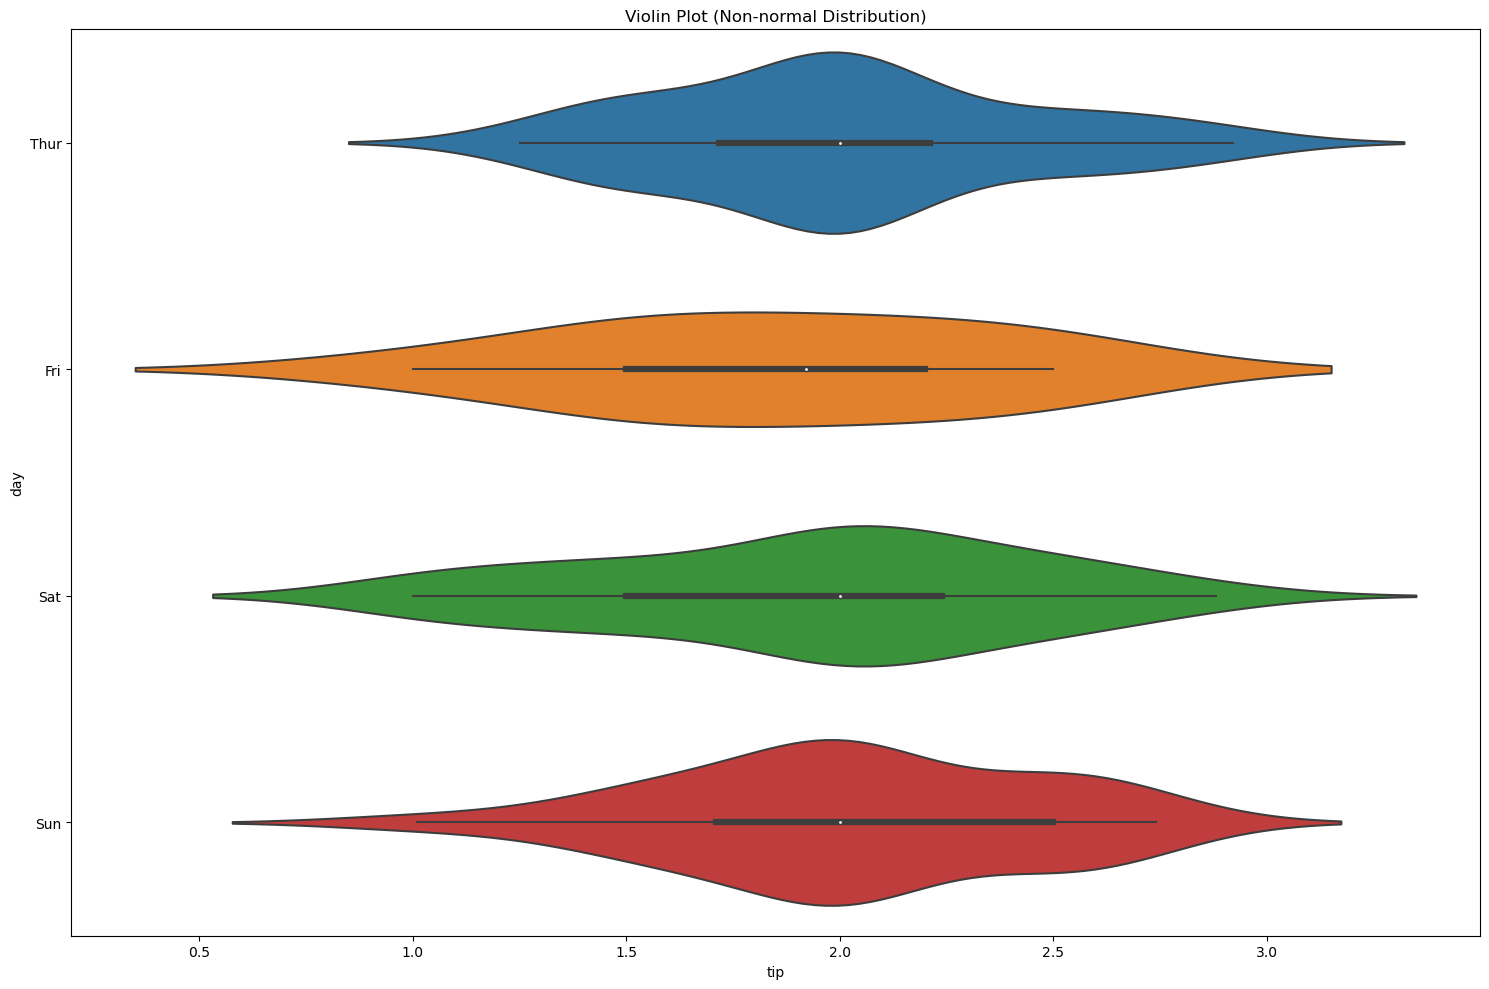

In [39]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Assuming df is your DataFrame
non_normal_tip_data = df[df['tip'] < df['tip'].mean()]

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Use gridspec for the first row (horizontal violin plot)
G = gridspec.GridSpec(1, 3)
axes_violin = plt.subplot(G[0, :])
sns.violinplot(x='tip', y='day', data=non_normal_tip_data, ax=axes_violin, orient='h')
axes_violin.set_title('Violin Plot (Non-normal Distribution)')

# You can add other subplots for the second and third rows if needed

plt.tight_layout()
plt.show()


## Using subplots on tips dataset

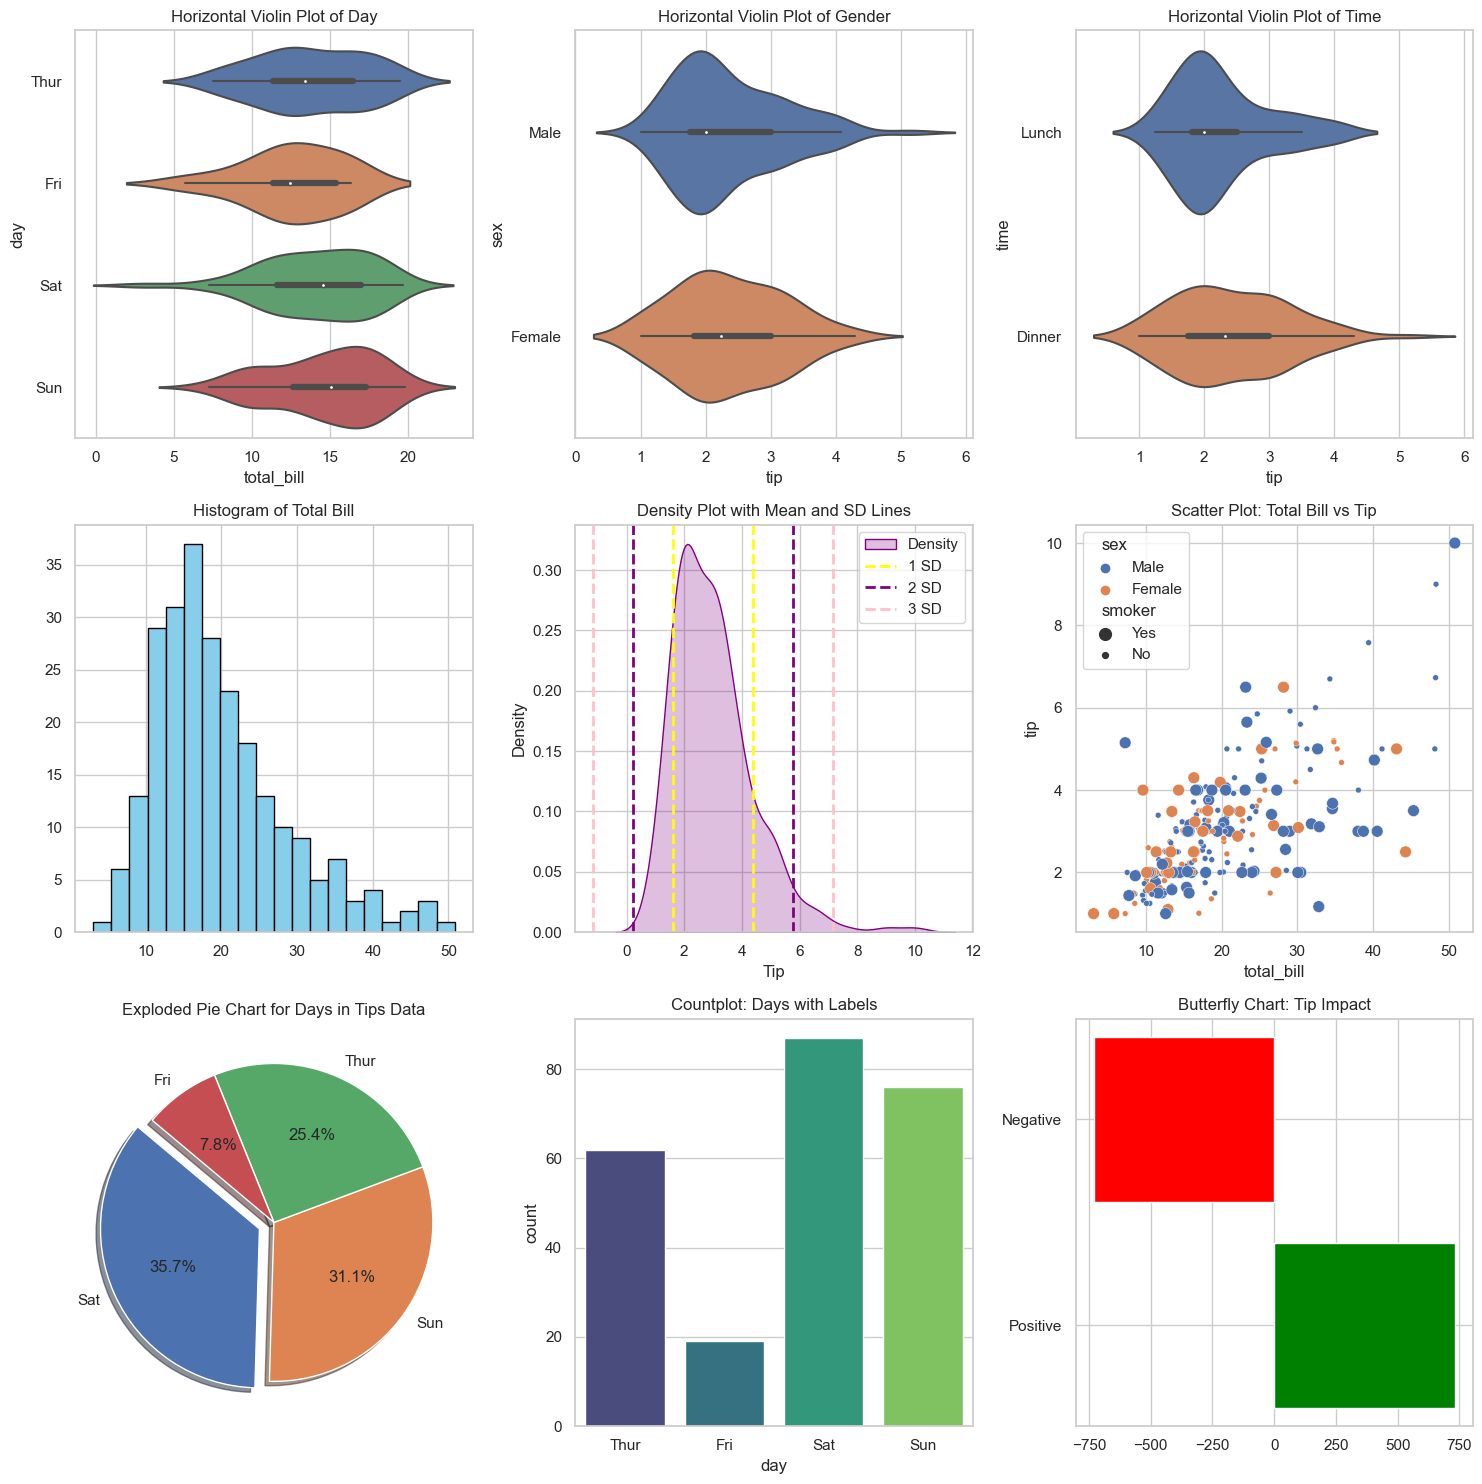

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Tips dataset
tips_df = sns.load_dataset('tips')

#  (A)  Create a (3, 3) grid of subplots
plt.figure(figsize=(15, 15))


# (B) First Row - Horizontal Violin Plot
plt.subplot(3, 3, 1)
non_normal_data = tips_df[tips_df['total_bill'] < tips_df['total_bill'].mean()]
sns.violinplot(x='total_bill', y='day', data=non_normal_data, orient='h')
plt.title('Horizontal Violin Plot of Day')

# (B) First Row -second column  Horizontal Violin Plot
plt.subplot(3, 3, 2)
sns.violinplot(x='tip', y='sex', data=non_normal_data, orient='h')
plt.title('Horizontal Violin Plot of Gender')

#  (B) First Row - third column  Horizontal Violin Plot
plt.subplot(3,3,3)
sns.violinplot(x='tip', y='time', data=non_normal_data, orient='h')
plt.title('Horizontal Violin Plot of Time')



# (c) Second Row - Histogram of Normal Distribution
plt.subplot(3, 3, 4)
plt.hist(tips_df['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Bill')



# (D)Second Row, Second Column - Density Plot with Lines
plt.subplot(3, 3, 5)
sns.kdeplot(tips_df['tip'], fill=True, color='purple', label='Density')
mean_tip = tips_df['tip'].mean()
std_tip = tips_df['tip'].std()
plt.axvline(mean_tip + std_tip, color='yellow', linestyle='dashed', linewidth=2, label='1 SD')
plt.axvline(mean_tip - std_tip, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(mean_tip + 2 * std_tip, color='purple', linestyle='dashed', linewidth=2, label='2 SD')
plt.axvline(mean_tip - 2 * std_tip, color='purple', linestyle='dashed', linewidth=2)
plt.axvline(mean_tip + 3 * std_tip, color='pink', linestyle='dashed', linewidth=2, label='3 SD')
plt.axvline(mean_tip - 3 * std_tip, color='pink', linestyle='dashed', linewidth=2)
plt.xlabel('Tip')
plt.ylabel('Density')
plt.title('Density Plot with Mean and SD Lines')
plt.legend()


# (E) Second Row, Third Column - Scatter Plot
plt.subplot(3, 3, 6)
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', size='smoker')
plt.title('Scatter Plot: Total Bill vs Tip')


# (F) Third Row, First Column - Exploded Pie Plot
plt.subplot(3, 3, 7)
category_counts = df['day'].value_counts()
# Explode the pie chart
explode = (0.1, 0, 0, 0)  # Explode the first slice (e.g., 'Thur')
# Creating a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
# Adding a title
plt.title('Exploded Pie Chart for Days in Tips Data')



# (G) Third Row, Second Column - Countplot with Names
plt.subplot(3, 3, 8)
sns.countplot(x='day', data=tips_df, palette='viridis')
plt.title('Countplot: Days with Labels')


# (H) Third Row, Third Column - Butterfly Chart
plt.subplot(3, 3, 9)
butterfly_data = pd.DataFrame({
    'Category': ['Positive', 'Negative'],
    'Value': [tips_df['tip'].sum(), -tips_df['tip'].sum()]
})
plt.barh(butterfly_data['Category'], butterfly_data['Value'], color=['green', 'red'])
plt.title('Butterfly Chart: Tip Impact')


# Adjust layout for better appearance
plt.tight_layout()
plt.show()


# without using subplots using ax

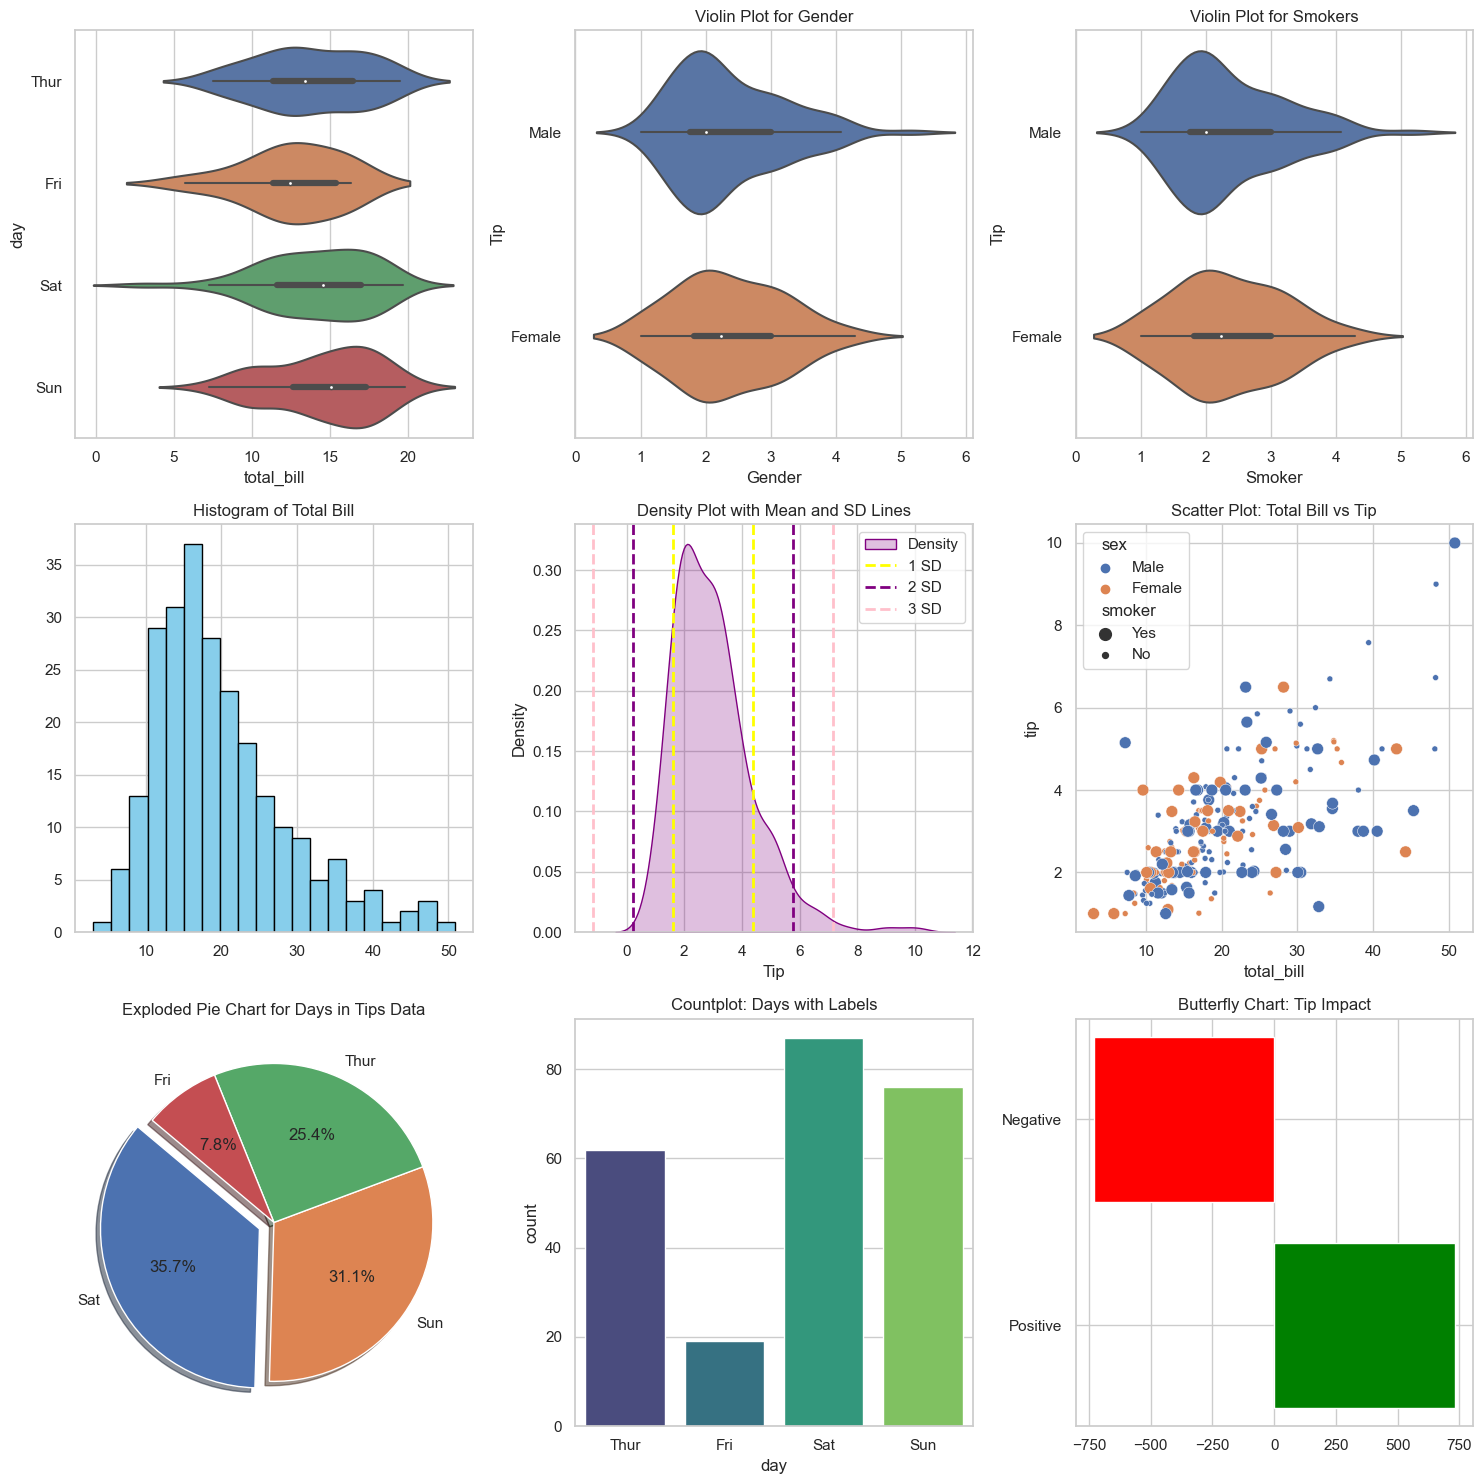

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec


# Load Tips dataset
df = sns.load_dataset('tips')

#  (A) Create a (3, 3) grid of axes
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# (B) First Row - Horizontal Violin Plot
non_normal_data = df[df['total_bill'] < df['total_bill'].mean()]
sns.violinplot(x='total_bill', y='day', data=non_normal_data, orient='h',ax=axes[0,0])
plt.title('Horizontal Violin Plot')

sns.violinplot(x='tip', y='sex', data=non_normal_data, ax=axes[0, 1], orient='h')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Tip')
axes[0, 1].set_title('Violin Plot for Gender')

sns.violinplot(x='tip', y='sex', data=non_normal_data, ax=axes[0, 2], orient='h')
axes[0, 2].set_xlabel('Smoker')
axes[0, 2].set_ylabel('Tip')
axes[0, 2].set_title('Violin Plot for Smokers')


# (C) Second Row - Histogram of Normal Distribution
axes[1, 0].hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Histogram of Total Bill')

# (D) Second Row, Second Column - Density Plot with Lines
sns.kdeplot(df['tip'], fill=True, color='purple', label='Density', ax=axes[1, 1])
mean_tip = df['tip'].mean()
std_tip = df['tip'].std()
axes[1, 1].axvline(mean_tip + std_tip, color='yellow', linestyle='dashed', linewidth=2, label='1 SD')
axes[1, 1].axvline(mean_tip - std_tip, color='yellow', linestyle='dashed', linewidth=2)
axes[1, 1].axvline(mean_tip + 2 * std_tip, color='purple', linestyle='dashed', linewidth=2, label='2 SD')
axes[1, 1].axvline(mean_tip - 2 * std_tip, color='purple', linestyle='dashed', linewidth=2)
axes[1, 1].axvline(mean_tip + 3 * std_tip, color='pink', linestyle='dashed', linewidth=2, label='3 SD')
axes[1, 1].axvline(mean_tip - 3 * std_tip, color='pink', linestyle='dashed', linewidth=2)
axes[1, 1].set_xlabel('Tip')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Density Plot with Mean and SD Lines')
axes[1, 1].legend()

# (E) Second Row, Third Column - Scatter Plot
sns.scatterplot( data=df,x='total_bill',y='tip',hue='sex',size='smoker',ax=axes[1, 2])
axes[1, 2].set_title('Scatter Plot: Total Bill vs Tip')

# (F) Third Row, First Column - Exploded Pie Plot
explode = (0.1, 0, 0, 0)  # Adjust the explode values as needed
category_counts = df['day'].value_counts()
axes[2, 0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
axes[2, 0].set_title('Exploded Pie Chart for Days in Tips Data')

# (G) Third Row, Second Column - Countplot with Names
sns.countplot(x='day', data=df, palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Countplot: Days with Labels')

# (H) Third Row, Third Column - Butterfly Chart
butterfly_data = pd.DataFrame({
    'Category': ['Positive', 'Negative'],
    'Value': [df['tip'].sum(), -df['tip'].sum()]
})
axes[2, 2].barh(butterfly_data['Category'], butterfly_data['Value'], color=['green', 'red'])
axes[2, 2].set_title('Butterfly Chart: Tip Impact')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


# Using subplots on tips dataset

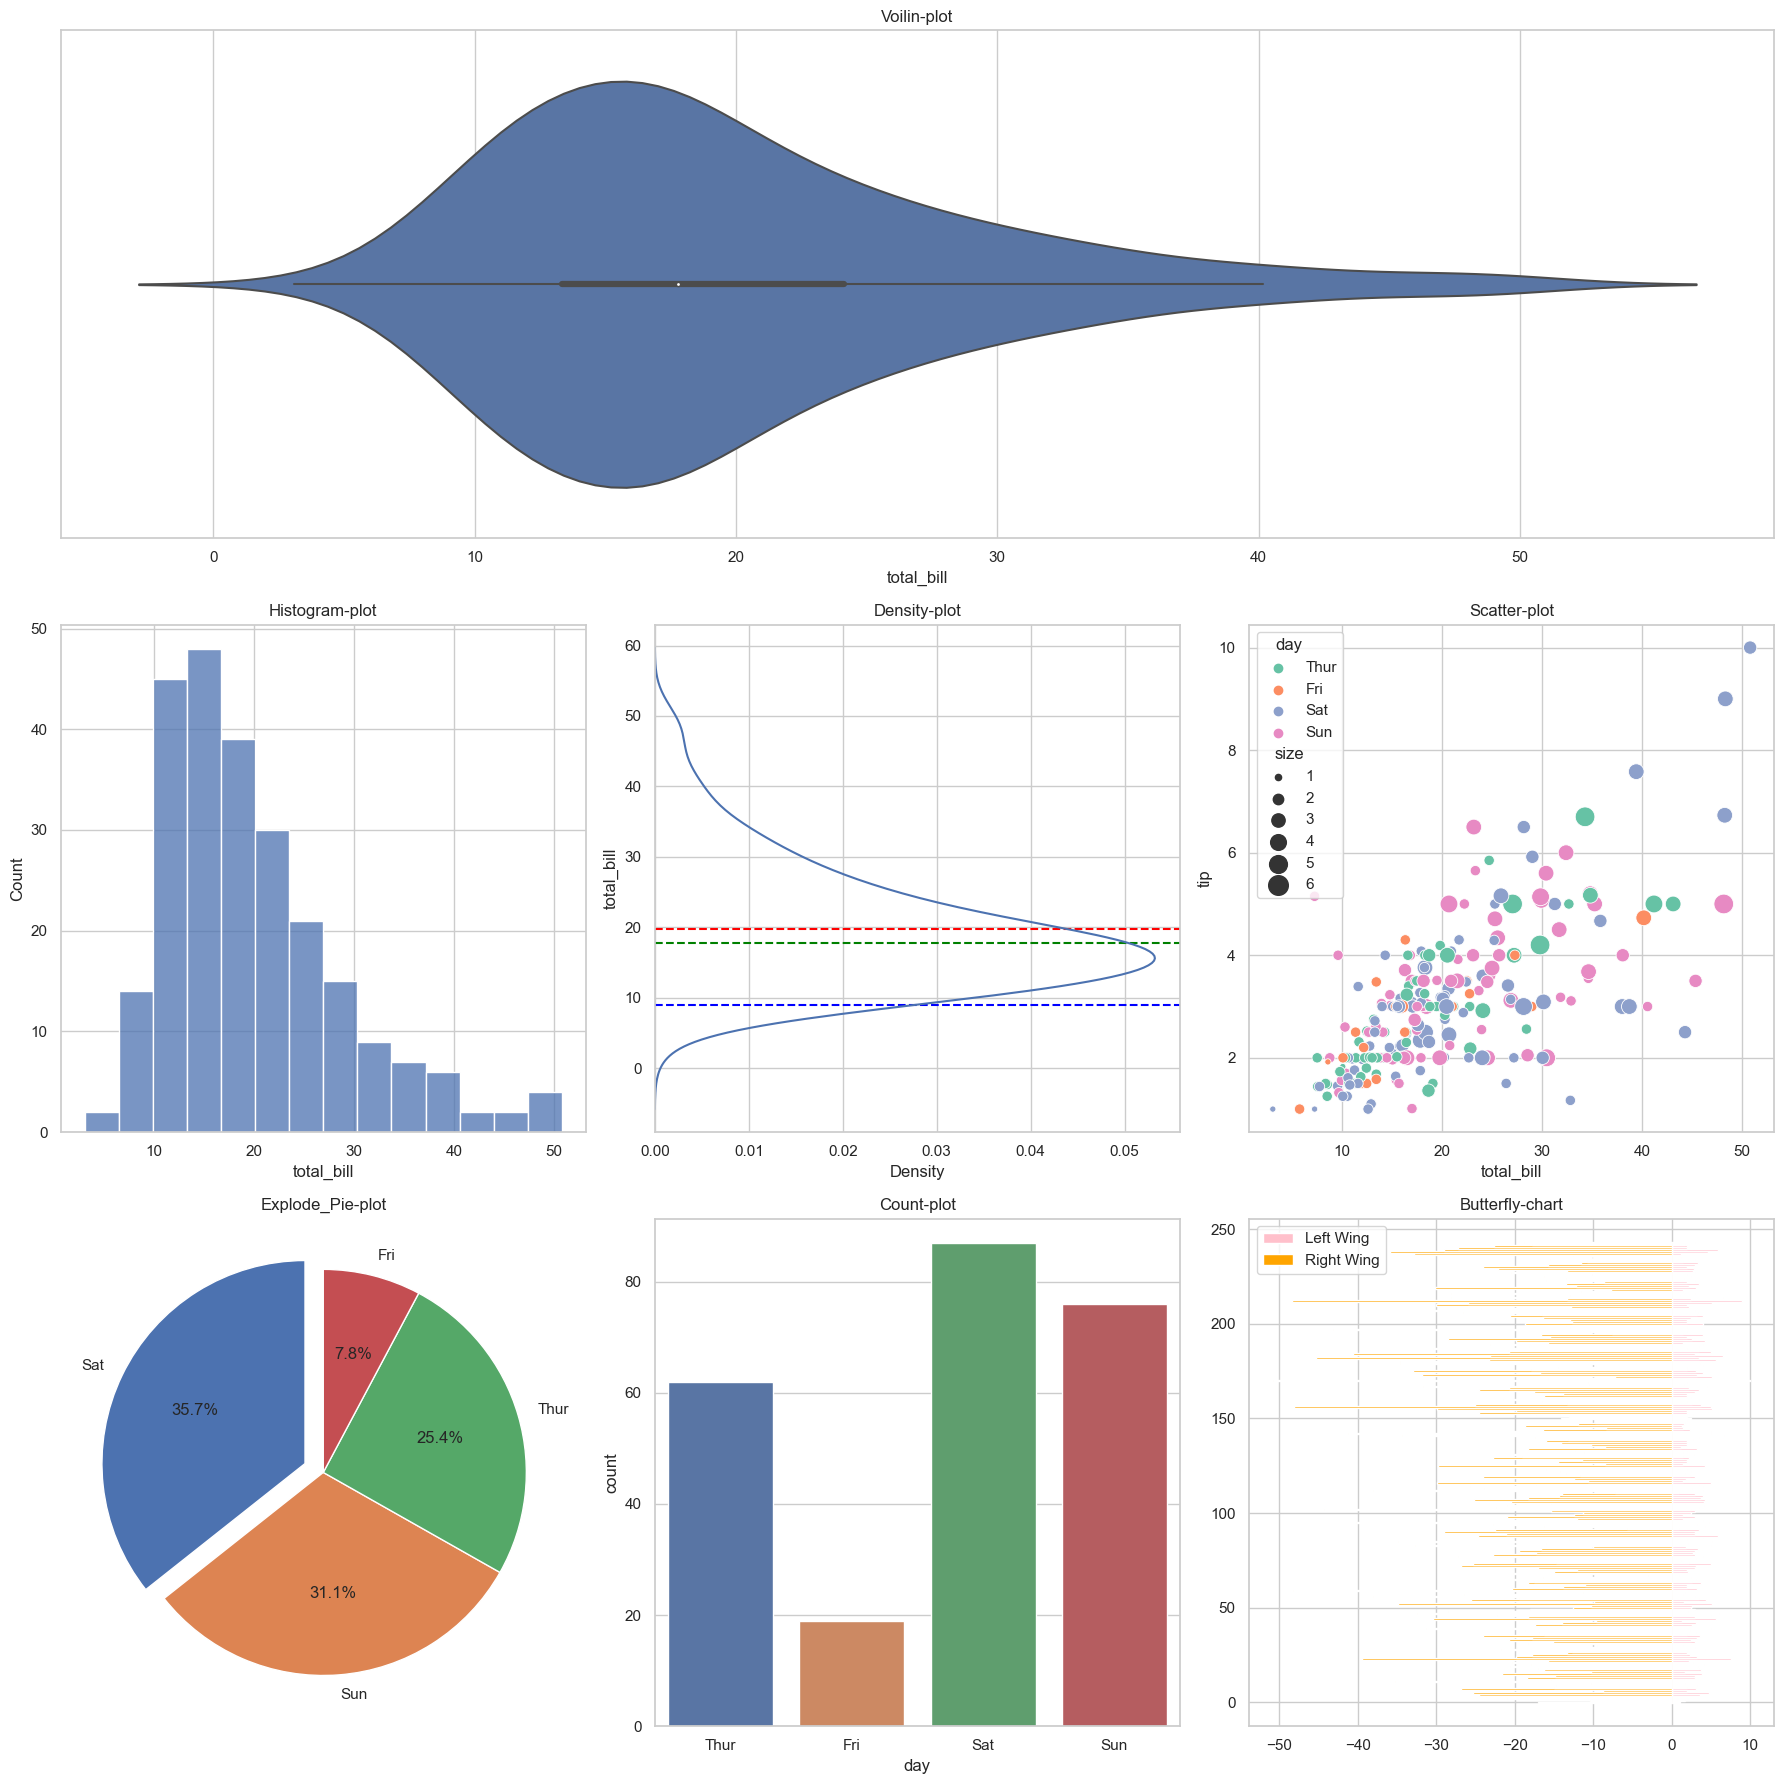

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec


# Load Tips dataset
tips = sns.load_dataset('tips')




fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

plt.subplot(gs[0, :])
sns.violinplot(x="total_bill", data=tips, orient="h")
plt.title('Voilin-plot')

plt.subplot(3, 3, 4)
sns.histplot(data=tips, x="total_bill")
plt.title('Histogram-plot')


plt.subplot(3, 3, 5)
mean_val = tips['total_bill'].mean()
median_val = tips['total_bill'].median()
std_dev = tips['total_bill'].std()
plt.axhline(mean_val, color='red', linestyle='dashed', label='Mean')
plt.axhline(median_val, color='green', linestyle='dashed', label='Median')
plt.axhline(std_dev, color='blue', linestyle='dashed', label='Standard')
sns.kdeplot(data=tips, y = "total_bill")
plt.title('Density-plot')

plt.subplot(3, 3, 6)
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="day", 
                palette="Set2", size="size", sizes=(20, 200))
plt.title('Scatter-plot')

plt.subplot(3, 3, 7)
day_counts = tips['day'].value_counts()
explode = (0.1, 0, 0, 0)
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90, explode = explode)
plt.title('Explode_Pie-plot')

plt.subplot(3, 3, 8)
sns.countplot(x='day', data=tips)
plt.title('Count-plot')

plt.subplot(3, 3, 9)
data_left = tips['tip']
data_right = tips['total_bill']
plt.barh(np.arange(len(data_left)), data_left, color='pink', label='Left Wing')
plt.barh(np.arange(len(data_right)), -data_right, color='orange', label='Right Wing')
plt.legend()
plt.title('Butterfly-chart')
plt.tight_layout()
plt.show()